<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/FitoFarm22-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем семь датасетов - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим, куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


In [1]:
### Загружаем данные и объединяем семь датасетов
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_09.csv', sep=';')
df04 = pd.read_csv('/content/orders01-03-22.csv', sep=';')
df05 = pd.read_csv('/content/orders04-06-22.csv', sep=';')
df06 = pd.read_csv('/content/orders07-09-22.csv', sep=';')
df07 = pd.read_csv('/content/orders10-12-22.csv', sep=';')
df08 = pd.read_csv('/content/orders10-12-23.csv', sep=';')

In [2]:
df = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08])
df.shape
# df[df["Дата отгрузки"].isnull()]

(8440, 32)

In [ ]:
def date_change(dtf):
  for i, data in dtf.iterrows():
    # print(i, type(data["Дата отгрузки"]))
    if type(data["Дата отгрузки"]) is float:
      dtf["Дата отгрузки"] = dtf["Принят в обработку"]

date_change(df)

# df01
df[df["Дата отгрузки"].isnull()]

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия


In [3]:
df.shape

(8440, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 1661
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Номер заказа                 8440 non-null   object 
 1   Номер отправления            8440 non-null   object 
 2   Принят в обработку           8440 non-null   object 
 3   Дата отгрузки                8352 non-null   object 
 4   Статус                       8440 non-null   object 
 5   Дата доставки                8023 non-null   object 
 6   Сумма отправления            8440 non-null   float64
 7   Код валюты отправления       8440 non-null   object 
 8   Наименование товара          8440 non-null   object 
 9   OZON id                      8440 non-null   int64  
 10  Артикул                      8440 non-null   int64  
 11  Итоговая стоимость товара    8440 non-null   float64
 12  Код валюты товара            8440 non-null   object 
 13  Количество        

In [ ]:
df.head(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
0,32901413-0114,32901413-0114-1,2023-03-31 19:48:33,2023-03-31 19:48:33,Доставлен,2023-04-05 11:24:30,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1,33790736-0039,33790736-0039-2,2023-03-31 19:10:52,2023-03-31 19:10:52,Доставлен,2023-04-01 17:18:39,318.0,RUB,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",520745178,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
2,32901413-0113,32901413-0113-1,2023-03-31 11:17:55,2023-03-31 11:17:55,Отменен,NaN,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
3,31169688-0104,31169688-0104-1,2023-03-31 10:46:57,2023-03-31 10:46:57,Доставлен,2023-04-06 11:15:52,260.0,RUB,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",520746323,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,NaN
4,33007656-0150,33007656-0150-2,2023-03-31 08:43:59,2023-03-31 08:43:59,Доставлен,2023-04-07 06:31:46,157.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN


In [ ]:
df.tail(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
768,0126429310-0074,0126429310-0074-9,2023-10-01 06:41:17,2023-10-01 06:41:17,Доставлен,2023-10-02 09:12:15,167.0,RUB,Чай травяной детская линия Сказка на ночь ф/п ...,479931483,...,"Москва, МО и Дальние регионы","Москва, МО и Дальние регионы",ЖУКОВСКИЙ_РФЦ,Московская Область,Долгопрудный,Курьер,Не премиум,нет,Ozon Карта,NaN
769,0126429310-0074,0126429310-0074-3,2023-10-01 06:41:17,2023-10-01 06:41:17,Доставлен,2023-10-02 09:12:15,151.0,RUB,Чай травяной Имбирь со стевией ф/п 1.5г №20 /2...,482741143,...,"Москва, МО и Дальние регионы","Москва, МО и Дальние регионы",ПУШКИНО_1_РФЦ,Московская Область,Долгопрудный,Курьер,Не премиум,нет,Ozon Карта,NaN
770,0126429310-0074,0126429310-0074-2,2023-10-01 06:41:17,2023-10-01 06:41:17,Доставлен,2023-10-02 09:12:13,150.0,RUB,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,482743745,...,"Москва, МО и Дальние регионы","Москва, МО и Дальние регионы",ЖУКОВСКИЙ_РФЦ,Московская Область,Долгопрудный,Курьер,Не премиум,нет,Ozon Карта,NaN
771,83181114-0307,83181114-0307-1,2023-10-01 04:40:55,2023-10-01 04:40:55,Доставлен,2023-10-04 06:38:26,164.0,RUB,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,482738956,...,Поволжье,Поволжье,САМАРА_РФЦ,Чувашская Республика - Чувашия,Чебоксары,ПВЗ,Не премиум,нет,Ozon Карта,NaN
772,0143546680-0001,0143546680-0001-1,2023-10-01 02:24:07,2023-10-01 02:24:07,Доставлен,2023-10-03 13:58:51,153.0,RUB,Чай травяной Друг Вашего давления ф/п 1.5г №20...,482740048,...,Урал,Урал,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,NaN,ПВЗ,Не премиум,нет,Картой онлайн,NaN


In [ ]:
df.columns

Index(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата отгрузки', 'Статус', 'Дата доставки', 'Сумма отправления',
       'Код валюты отправления', 'Наименование товара', 'OZON id', 'Артикул',
       'Итоговая стоимость товара', 'Код валюты товара', 'Количество',
       'Стоимость доставки', 'Связанные отправления', 'Выкуп товара',
       'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
       'Объемный вес товаров, кг', 'Кластер отгрузки', 'Кластер доставки',
       'Склад отгрузки', 'Регион доставки', 'Город доставки',
       'Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
       'Способ оплаты', 'Штрихкод ювелирного изделия'],
      dtype='object')

In [ ]:
### Убираем ненужные колонки и выбираем случайные 5 записей
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки', 'Сумма отправления',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
#        'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
#        'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата доставки',
       'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
       'Объемный вес товаров, кг', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
# df = df.drop(['Стоимость доставки'], axis=1)

df.sample(5)

,Дата отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
886,2023-01-23 05:42:57,Доставлен,148.0,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,148.0,1,310.0,52%,162.0,"Системная виртуальная скидка селлера, Хиты. Дл...",Центр и дальние регионы,Москва Юг (Недействительный),ПУШКИНО_1_РФЦ,Москва,Москва,ПВЗ,Не премиум,нет,Ozon Карта
562,2023-10-09 14:59:48,Доставлен,157.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,157.0,1,400.0,61%,243.0,"Системная виртуальная скидка селлера, Хиты Мул...",Центр,Центр,СОФЬИНО_РФЦ,Владимирская Область,Владимир,ПВЗ,Не премиум,нет,Ozon Карта
11,2023-06-29 13:39:39,Доставлен,153.0,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,153.0,1,350.0,56%,197.0,"Летняя распродажа одежды и не только. Хиты, Си...",Москва и МО,Московская область Юг 4,ЖУКОВСКИЙ_РФЦ,Москва,Москва,Курьер,Не премиум,нет,Картой онлайн
47,2022-09-27 05:45:49,Доставлен,171.0,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,171.0,1,339.0,50%,168.0,"Системная виртуальная скидка селлера, 🍦🐶 Food&...","Москва, МО и дальние регионы",Московская область Юг (Недействительный),ПУШКИНО_1_РФЦ,Москва,Внуковское,Курьер,Премиум,нет,Ozon Карта
605,2023-10-07 18:12:15,Доставлен,264.0,"Чай эхинацеи трава 50г/ травяной сбор ""Целебна...",264.0,1,440.0,40%,176.0,"Системная виртуальная скидка селлера, СуперХит...",Санкт-Петербург и СЗО,NaN,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Картой онлайн


In [5]:
### Пересохраняем данные без статуса  'Отменен', если нужно проанализировать отмененные заказы,
### меняем условие в запросе df_cancel = df.loc[df['Статус'] == 'Отменен']
df = df.loc[df['Статус'] != 'Отменен']
df.shape

(8158, 32)

In [6]:
### Посчитаем статистику после того, как мы удалили отмененные заказы: Стоимость и количество
df.describe()

,Сумма отправления,OZON id,Артикул,Итоговая стоимость товара,Количество,Стоимость доставки,Связанные отправления,Выкуп товара,Цена товара до скидок,Скидка руб,"Объемный вес товаров, кг",Штрихкод ювелирного изделия
count,8158.000000,8.158000e+03,8158.000000,8158.000000,8158.000000,0.0,0.0,0.0,8158.000000,8158.000000,8158.000000,0.0
mean,195.406229,5.147951e+08,79899.478916,191.764539,1.021451,NaN,NaN,NaN,397.498989,209.819521,0.115261,NaN
std,111.014756,1.278324e+08,100158.067393,103.648819,0.212761,NaN,NaN,NaN,189.506220,118.194608,0.044743,NaN
min,47.500000,4.799315e+08,688.000000,47.500000,1.000000,NaN,NaN,NaN,229.000000,80.000000,0.100000,NaN
25%,155.607500,4.827388e+08,68965.000000,155.000000,1.000000,NaN,NaN,NaN,310.000000,157.000000,0.100000,NaN
50%,167.000000,4.827398e+08,68970.000000,165.000000,1.000000,NaN,NaN,NaN,350.000000,179.000000,0.100000,NaN
75%,181.000000,4.827438e+08,69244.000000,181.000000,1.000000,NaN,NaN,NaN,399.000000,200.000000,0.100000,NaN
max,1664.680000,1.295436e+09,689761.000000,950.000000,8.000000,NaN,NaN,NaN,2233.000000,3980.000000,0.900000,NaN


In [ ]:
# # Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
# df['Дата отгрузки']
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.insert(1, 'Год_отгрузки', df['Дата отгрузки'].dt.year)
df.insert(2, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
df = df.drop(['Дата отгрузки'], axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)
df.sample(5)


<ipython-input-142-0602db2962b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")


,Год_отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
1355,2022,October,Доставлен,171.00,Чай травяной Друг Вашего сердца ф/п 1.5г №20 /...,171.00,1,339.00,50%,168.0,"Системная виртуальная скидка селлера, Чайные б...",Поволжье,Московская область Юг (Недействительный),НИЖНИЙ_НОВГОРОД_РФЦ,Московская Область,Видное,ПВЗ,Не премиум,нет,Картой онлайн
1636,2022,October,Доставлен,181.00,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,181.00,1,339.00,47%,158.0,"Системная виртуальная скидка селлера, Чайные б...",Поволжье,Ленинградская область (Недействительный),НИЖНИЙ_НОВГОРОД_РФЦ,Ленинградская Область,NaN,ПВЗ,Премиум,нет,Ozon Карта
762,2023,October,Доставлен,158.00,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,158.00,1,350.00,55%,192.0,"🥑Скидки на Ozon fresh ""промо 19"" - скидки от 1...","Москва, МО и Дальние регионы","Москва, МО и Дальние регионы",ЖУКОВСКИЙ_РФЦ,Москва,Москва,ПВЗ,Премиум,нет,Ozon Карта
423,2022,December,Доставлен,116.25,Чай травяной Друг Вашего давления ф/п 1.5г №20...,116.25,1,271.25,57%,155.0,"Системная виртуальная скидка селлера, Хиты. Че...",Юг,Краснодар,РОСТОВ-НА-ДОНУ_РФЦ,Краснодарский Край,Сочи,Курьер,Премиум,нет,Картой онлайн
509,2022,August,Доставлен,237.00,"Чай эхинацеи трава 50г/ травяной сбор ""Целебна...",237.00,1,438.50,46%,201.5,"Купи два чая - получи скидку 5%, Системная вир...","Москва, МО и дальние регионы",Московская область Север (Недействительный),ХОРУГВИНО_РФЦ,Московская Область,Королев,ПВЗ,Не премиум,нет,Картой онлайн


In [ ]:
# Создаем пример серии с названиями месяцев
# data = pd.Series(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
data = df['Месяц отгрузки']

# Создаем словарь, сопоставляющий названия месяцев и порядковые номера
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Используем метод .map() для замены названий месяцев на порядковые номера
df['Номер месяца'] = data.map(month_to_number)

df.head(10)



,Год_отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Номер месяца
0,2023,March,Доставлен,157.0,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,157.0,1,350.0,55%,193.0,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,3
1,2023,March,Доставлен,318.0,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",318.0,1,435.0,27%,117.0,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,3
3,2023,March,Доставлен,260.0,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",260.0,1,440.0,41%,180.0,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,3
4,2023,March,Доставлен,157.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,157.0,1,350.0,55%,193.0,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,3
5,2023,March,Доставлен,128.0,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,128.0,1,321.0,60%,193.0,...,Москва и МО,Йошкар-Ола,ПУШКИНО_2_РФЦ,Республика Марий Эл,Звенигово,ПВЗ,Не премиум,нет,Ozon Карта,3
6,2023,March,Доставлен,150.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,150.0,1,301.0,50%,151.0,...,Поволжье,Екатеринбург,САМАРА_РФЦ,Свердловская Область,NaN,ПВЗ,Не премиум,нет,Картой онлайн,3
7,2023,March,Доставлен,157.0,Чай травяной детская линия Сказка на ночь ф/п ...,157.0,1,350.0,55%,193.0,...,Урал,Барнаул,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Алтайский Край,Барнаул,ПВЗ,Не премиум,нет,Ozon Карта,3
8,2023,March,Доставлен,157.0,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,157.0,1,350.0,55%,193.0,...,Москва и МО,Санкт-Петербург Север,ПУШКИНО_2_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Картой онлайн,3
9,2023,March,Доставлен,157.0,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,157.0,1,350.0,55%,193.0,...,Юг,Ростов,АДЫГЕЙСК_РФЦ,Ростовская Область,Ростов-на-Дону,ПВЗ,Не премиум,нет,Ozon Карта,3
10,2023,March,Доставлен,153.0,Чай травяной Друг Вашей поджелудочной железы ф...,153.0,1,339.0,55%,186.0,...,Юг,Санкт-Петербург Север,АДЫГЕЙСК_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Картой онлайн,3


In [ ]:
df['Месяц отгрузки']

0        March
1        March
3        March
4        March
5        March
        ...   
768    October
769    October
770    October
771    October
772    October
Name: Месяц отгрузки, Length: 7292, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']

In [7]:
df.to_excel('/content/orders22_23.xlsx')
# df.to_csv('/content/orders22_23.csv')

In [8]:
### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки
df.isnull().sum().sort_values()

Номер заказа                      0
Склад отгрузки                    0
Объемный вес товаров, кг          0
Акции                             0
Скидка руб                        0
Скидка %                          0
Цена товара до скидок             0
Сегмент клиента                   0
Способ оплаты                     0
Юридическое лицо                  0
Код валюты товара                 0
Количество                        0
Артикул                           0
OZON id                           0
Наименование товара               0
Код валюты отправления            0
Сумма отправления                 0
Статус                            0
Принят в обработку                0
Номер отправления                 0
Итоговая стоимость товара         0
Способ доставки                   0
Кластер доставки                 37
Дата отгрузки                    62
Регион доставки                  63
Дата доставки                   135
Кластер отгрузки                793
Город доставки              

In [ ]:
# теперь можем видеть количество товара отгруженного по месяцам
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January       447
February      428
March         554
April         500
May           471
June          386
July          488
August        633
September    1051
October      1216
November      619
December      499
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

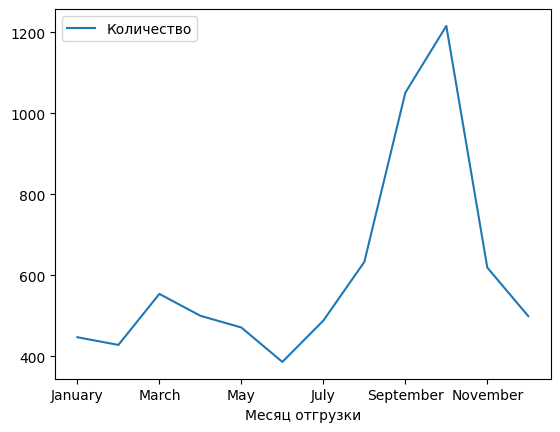

In [ ]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot(legend=True)

In [ ]:
# а также сумму, не всегда большее количество соответсвует большей сумме
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January       79813.00
February      93905.18
March         99533.05
April         89769.82
May           83986.05
June          79001.50
July          96653.25
August       120911.00
September    191009.02
October      246840.25
November     104777.01
December      89043.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

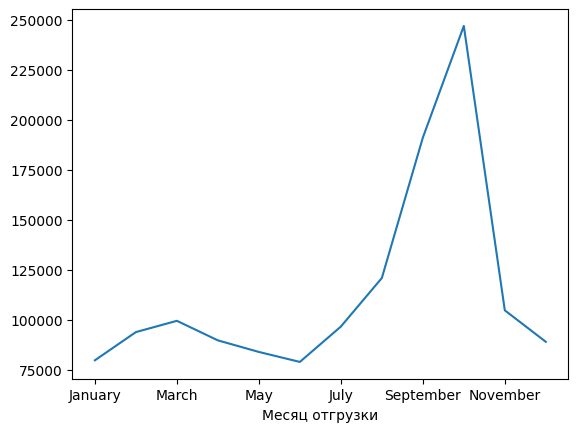

In [ ]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

In [ ]:
### Выведем общую сумму продаж
df['Итоговая стоимость товара'].sum()

1375242.13

In [ ]:
### Дубликаты есть, потому названия товара повторяются
df.duplicated().sum()

932

In [ ]:
# Склад отгрузки нет нулевых значений, посмотрим уникальные названия
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СОФЬИНО_РФЦ',
       'СПБ_ШУШАРЫ_РФЦ', 'НОВАЯ_РИГА_РФЦ'], dtype=object)

In [ ]:
# Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
ПУШКИНО_1_РФЦ                801
НОВАЯ_РИГА_РФЦ               787
РОСТОВ-НА-ДОНУ_РФЦ           699
НИЖНИЙ_НОВГОРОД_РФЦ          677
САМАРА_РФЦ                   652
ХОРУГВИНО_РФЦ                610
ВОРОНЕЖ_МРФЦ                 458
СПБ_БУГРЫ_РФЦ                426
САНКТ-ПЕТЕРБУРГ_РФЦ          426
ЖУКОВСКИЙ_РФЦ                362
ПУШКИНО_2_РФЦ                322
НОВОРОССИЙСК_МРФЦ            245
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       203
КАЗАНЬ_РФЦ_НОВЫЙ             155
ТВЕРЬ_РФЦ                    151
АДЫГЕЙСК_РФЦ                 120
СПБ_ШУШАРЫ_РФЦ                92
СОФЬИНО_РФЦ                   36
КРАСНОЯРСК_МРФЦ               31
НОВОСИБИРСК_РФЦ_НОВЫЙ         31
КАЛИНИНГРАД_МРФЦ               2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

In [ ]:
# Регион доставки можем также отсортировать,
# 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                     1344
Московская Область         1184
Санкт-Петербург             697
Краснодарский Край          574
Ленинградская Область       294
Ростовская Область          250
Татарстан Республика        217
Самарская Область           201
Воронежская Область         159
Нижегородская Область       134
Волгоградская Область       103
Ставропольский Край          84
Тульская Область             79
Тверская Область             78
Владимирская Область         78
Свердловская Область         72
Белгородская Область         70
Саратовская Область          65
Республика Коми              64
Калининградская Область      57
Name: Количество, dtype: int64

In [ ]:
# Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.
# ABC анализ
df_abc = df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)
result, res = [], []
sum_result = 0
for i in df_abc:
  procent = round((i / df_abc.sum() * 100), 2)
  result.append(procent)
  sum_result += procent
  if sum_result < 80:
    res.append('A')
  elif 80 <= sum_result < 95:
    res.append('B')
  else:
    res.append('C')


df_abc_new = df_abc.to_frame().reset_index()
df_abc_new['percent'] = result
df_abc_new['sum_res'] = res
df_abc_new

,Наименование товара,Количество,percent,sum_res
0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,999,13.70,A
1,Чай травяной Друг Вашей поджелудочной железы ф...,674,9.24,A
2,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,426,5.84,A
3,"Чайный напиток травяной листья Брусники ф/п 1,...",420,5.76,A
4,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,365,5.01,A
...,...,...,...,...
58,Чай травяной Друг Вашего сна 2 пачки /40 фильт...,4,0.05,C
59,Чай травяной Друг Вашего сердца 2 пачки /40 фи...,3,0.04,C
60,Чай травяной Друг Ваших суставов 2 пачки /40 ф...,3,0.04,C
61,Чай травяной Друг Ваших почек 2 пачки /40 филь...,2,0.03,C


In [ ]:
# Доставка по условию: Регион доставки 'Краснодарский Край'
krasnd_krai = df[df['Регион доставки'] == 'Краснодарский Край'].groupby(['Наименование товара'])['Количество'].count()
krasnd_krai.sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           78
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          59
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             55
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              35
Чай травяной Друг Вашего сердца ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                            29
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             25
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                            23
Чай травяной Друг Ваших суставов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           22
Чай травяной Домбайский вальс Шиповник ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай,

In [ ]:
### Отсортируем Товар по сумме продаж.
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           163132.85
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             110225.60
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                    84023.34
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                               71595.71
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор     69071.60
                                                                                                               ...    
Чай травяной Друг Вашего сна 2 пачки /40 фильтр пакетиков Фитосбор, фиточай                                    1385.98
Чай травяной Друг Вашего сердца 2 пачки /40 фильтр пакетиков Фитосбор, фиточай                                 1024.00
Чай травяной Друг Ваших суст

In [ ]:
# Проверим откуда и куда больше отправляют товар, отсортируем Склад отгрузки  и Регион доставки
# df.rename(columns={"Склад отгрузки": "Склад_отгрузки", "Регион доставки": "Регион_доставки"}, inplace=True)
name_region = df.groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
# Можно выгрузить данные по "Склад" - "Регион" в файл excel
name_region.to_excel("output.xlsx")
name_region


Склад отгрузки             Регион доставки                
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Волгоградская Область              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Краснодарский Край                 1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Краснодарский Край                 2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Ростовская Область                 1
FRESH_MAX_РСТ_ШОЛОХОВО     Ростовская Область                 1
                                                             ..
ХОРУГВИНО_РФЦ              Челябинская Область                2
                           Чеченская Республика               3
                           Чувашская Республика - Чувашия     1
                           Ямало-Ненецкий Автономный округ    7
                           Ярославская Область                4
Name: Количество, Length: 689, dtype: int64

In [ ]:
# Анализ доставки в регионы по каждому складу - 'ХОРУГВИНО_РФЦ'
name_region_horugvino = df[df['Склад отгрузки'] == 'ХОРУГВИНО_РФЦ'].groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
name_region_horugvino.sort_values(ascending=False)

Склад отгрузки  Регион доставки                         
ХОРУГВИНО_РФЦ   Москва                                      185
                Московская Область                          160
                Санкт-Петербург                              30
                Самарская Область                            20
                Татарстан Республика                         19
                Краснодарский Край                           19
                Ленинградская Область                        16
                Республика Коми                              13
                Нижегородская Область                        12
                Владимирская Область                         11
                Рязанская Область                            10
                Мурманская Область                            7
                Ямало-Ненецкий Автономный округ               7
                Саратовская Область                           7
                Республика Карелия             

In [ ]:
# Анализ доставки в регионы по каждому складу - 'АДЫГЕЙСК_РФЦ'
name_region_adygey = df[df['Склад отгрузки'] == 'АДЫГЕЙСК_РФЦ'].groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
name_region_adygey.sort_values(ascending=False)

Склад отгрузки  Регион доставки                    
АДЫГЕЙСК_РФЦ    Краснодарский Край                     66
                Ростовская Область                     11
                Волгоградская Область                   9
                Воронежская Область                     9
                Ставропольский Край                     6
                Республика Северная Осетия - Алания     3
                Санкт-Петербург                         2
                Белгородская Область                    2
                Республика Ингушетия                    2
                Астраханская Область                    1
                Тюменская Область                       1
                Сахалинская Область                     1
                Пермский Край                           1
                Псковская Область                       1
                Московская Область                      1
                Крым Республика                         1
                Кеме

In [ ]:
# Проверим откуда больше отправляют товар, отсортируем Наименование и Склад отгрузки
name_tea_by_storage = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Склад отгрузки'])['Количество'].count()
name_tea_by_storage.sort_values(ascending=False)

Наименование товара                                                                 Склад отгрузки        
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  САМАРА_РФЦ                114
                                                                                    НОВАЯ_РИГА_РФЦ            113
                                                                                    НИЖНИЙ_НОВГОРОД_РФЦ       109
                                                                                    ПУШКИНО_1_РФЦ             106
                                                                                    ВОРОНЕЖ_МРФЦ               98
                                                                                    РОСТОВ-НА-ДОНУ_РФЦ         96
                                                                                    ЖУКОВСКИЙ_РФЦ              61
                                                                                    ХОРУГВИНО_Р

In [ ]:
# Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки
name_tea_by_region = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Регион доставки'])['Количество'].count()
name_tea_by_region.sort_values(ascending=False)


Наименование товара                                                                 Регион доставки                
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  Московская Область                 176
                                                                                    Москва                             174
                                                                                    Санкт-Петербург                     91
                                                                                    Краснодарский Край                  78
                                                                                    Ростовская Область                  33
                                                                                                                      ... 
                                                                                    Карачаево-Черкесская Республика      1
                       

In [ ]:
# Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.
name_sklad = df.groupby(['Склад отгрузки', 'Наименование товара'])['Количество'].count()
name_sklad.head(50)

Склад отгрузки             Наименование товара                                                                                      
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_РСТ_ШОЛОХОВО     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
АДЫГЕЙСК_РФЦ               Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая                                             2
                           Фитосб

In [ ]:
# Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Месяц отгрузки
False                January            393
                     February           385
                     March              461
                     April              418
                     May                411
                     June               318
                     July               410
                     August             519
                     September          906
                     October           1109
                     November           522
                     December           441
True                 January             54
                     February            43
                     March               93
                     April               82
                     May                 60
                     June                68
                     July                78
                     August             114
                     September          145
                     October            

In [ ]:
# @title
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January            71736.00
                     February           86302.66
                     March              85103.02
                     April              77056.34
                     May                74409.11
                     June               67896.00
                     July               83336.26
                     August            101423.42
                     September         166998.02
                     October           228103.63
                     November           89720.57
                     December           80024.25
True                 January             8077.00
                     February            7602.52
                     March              14430.03
                     April              12713.48
                     May                 9576.94
                     June               11105.50
                     July               13316.99
                     August      

# 4. Результаты исследования

### Общие выводы
С помощью данного инструмента (pandas) мы можем провести анализ как по каждой позиции - количество продаж, сумма, с какого склада и в какой регион больше отправка, так и видеть общую картину в целом. Определять пик продаж по месяцам, а нужно и по неделям. Группировать продажи, комбинировать разные параметры. Визуализация позволяет строить как обычные графики, так и в виде гистограм, круговых диаграм. Данный пример показывает возможности обработки данных его анализа и вывода результатов. Также возможен вывод данных в любой удобный формат, как ecxel, csv, json.
### Рекомендации
1.   Рекомендовать увеличить поставки наиболее продаваемого товара
2.   Использовать скидки в месяцы с наименьшими продажами
3.   В летние месяцы спад продаж, осенью и зимой больше затаривать склады
4.   Больше поставлять товар в регионы, но и не забывать про центр и северо-запад.



